# Matrices, normas y eigenvalores/eigenvectores.

**Objetivo.** Revisar e ilustrar los conceptos de matrices, sus normas, sus eigenvalores y sus eigenvectores usando la biblioteca `numpy`.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Algebra_Lineal_01">MACTI-Algebra_Lineal_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922

In [2]:
# Importamos las bibliotecas requeridas
import numpy as np
import sympy
import ipywidgets as widgets
import macti.visual as mvis
import macti.matem as mmat


Sea $A = a_{ij}$ una matriz de $n \times n$, donde $n$ indica la dimensi√≥n de la matriz ($n$ renglones por $n$ columnas). Los n√∫meros $a_{ij}$ son los elementos de la matriz, donde $i,j = 1,\dots,n$. $A$ y sus elementos se escriben como sigue:

$$
A = 
\left(
\begin{array}{cccc}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots & \vdots& \ddots & \vdots \\
a_{n1} & a_{n2} & \dots & a_{nn}\\
\end{array}
\right)
$$

La matriz $A^T = {a_{ji}}$ es la matriz transpuesta.
$$
A^T = 
\left(
\begin{array}{cccc}
a_{11} & a_{21} & \dots & a_{n1}\\
a_{12} & a_{22} & \dots & a_{n2}\\
\vdots & \vdots& \ddots & \vdots \\
a_{1n} & a_{2n} & \dots & a_{nn}\\
\end{array}
\right)
$$

Definamos una matriz usando `numpy`:

In [3]:
A = np.array([[2, 3, 5],
              [1, -4, 8],
              [8, 6, 3]])
print(A)

[[ 2  3  5]
 [ 1 -4  8]
 [ 8  6  3]]


## Matriz transpuesta
La matriz $A^T = {a_{ji}}$ es la matriz transpuesta.

In [5]:
# Calcular la matriz transpuesta
AT = A.T

print(AT)

[[ 2  1  8]
 [ 3 -4  6]
 [ 5  8  3]]


## Matriz identidad
La matriz identidad $I$ es aquella donde todas sus entradas son cero excepto en la diagonal donde sus entradas son 1.

In [6]:
# Definimos una matriz identidad
I = np.eye(3)

print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Matriz inversa
La matriz inversa de $A$ se denota por $A^{-1}$ y es tal que $A^{-1}A = I$.

In [7]:
# Calculamos la matriz inversa
Ainv = np.linalg.inv(A)

print(Ainv)

[[-0.23715415  0.08300395  0.17391304]
 [ 0.24110672 -0.13438735 -0.04347826]
 [ 0.15019763  0.04743083 -0.04347826]]


In [10]:
# Comprobar que Ainv es la inversa de A
AA = np.dot(A, Ainv)

print(AA)

[[ 1.00000000e+00 -6.93889390e-18  2.77555756e-17]
 [ 2.22044605e-16  1.00000000e+00  0.00000000e+00]
 [ 8.32667268e-17  3.46944695e-17  1.00000000e+00]]


## Matriz diagonal
Una matriz $A = {a_{ij}}$ se llama diagonal si $a_{ij}=0, \forall i \ne j$ y se denota por $A = \mbox{diag}$ ${a_{ii}}$.

In [11]:
print(A)

[[ 2  3  5]
 [ 1 -4  8]
 [ 8  6  3]]


In [16]:
AD = np.diagonal(A)
print(AD)

[ 2 -4  3]


In [17]:
# Diagonales inferiores
AD = np.diagonal(A,1)
print(AD)

[3 8]


In [18]:
# Diagonales superiores
AD = np.diagonal(A,-1)
print(AD)

[1 6]


## Matriz triangular superior e inferior
Una matriz $A = {a_{ij}}$ se llama triangular superior si $a_{ij} = 0, \forall i > j$ y triangular inferior si $a_{ij} = 0, \forall i < j$.

In [19]:
# Matriz triangular superior
ATS = np.triu(A)
print(ATS)

[[ 2  3  5]
 [ 0 -4  8]
 [ 0  0  3]]


In [20]:
# Matriz triangular inferior
ATI = np.tril(A)
print(ATI)

[[ 2  0  0]
 [ 1 -4  0]
 [ 8  6  3]]


## Matrices sim√©tricas
Una matriz $A$ es sim√©trica si $A^T = A$ y antisim√©trica si $A^T = -A$.

In [21]:
B = np.array([[2, 3, 5],
              [3, -4, 8],
              [5, 8, 3]])

In [22]:
print('Matriz A = \n{} \n\nMatriz B = \n{}'.format(A,B))

Matriz A = 
[[ 2  3  5]
 [ 1 -4  8]
 [ 8  6  3]] 

Matriz B = 
[[ 2  3  5]
 [ 3 -4  8]
 [ 5  8  3]]


In [23]:
# Definimos una funci√≥n para checar si una matriz es sim√©trica
isSymmetric = lambda mat: np.array_equal(mat, mat.T)

In [24]:
isSymmetric(B)

True

In [25]:
isSymmetric(A)

False

<div class="alert alert-info">

**Nota**. En el ejemplo anterior estamos usando la declaraci√≥n `lambda` para definir una funci√≥n en una sola l√≠nea. Esta funci√≥n recibe una matriz `mat` y utiliza la funci√≥n `np.array_equal()` de `numpy` para verificar si dos matrices son iguales, en este caso `mat` y su transpuesta `mat.T`.
</div>

## Matriz ortogonal
Una matriz $A$ es ortogonal si $A^T A = I$, o equivalentemente $A^T = A^{-1}$.

La [matriz rotaci√≥n](https://es.wikipedia.org/wiki/Matriz_de_rotaci%C3%B3n) en 2D es una matriz ortogonal y se define como sigue:

$$
R(\theta )=
\begin{bmatrix}
\cos \theta &-\sin \theta \\
\sin \theta & \cos \theta \\
\end{bmatrix}
$$

Para definir esta matriz usamos `sympy`:

In [34]:
ùúÉ = sympy.symbols('ùúÉ')

# Matriz rotaci√≥n
R = sympy.Matrix([[sympy.cos(ùúÉ), -sympy.sin(ùúÉ)],
                  [sympy.sin(ùúÉ), sympy.cos(ùúÉ)]])
R

Matrix([
[cos(ùúÉ), -sin(ùúÉ)],
[sin(ùúÉ),  cos(ùúÉ)]])

Verifiquemos que cumple con las propiedades de una matriz ortogonal.

In [35]:
R.T

Matrix([
[ cos(ùúÉ), sin(ùúÉ)],
[-sin(ùúÉ), cos(ùúÉ)]])

In [36]:
R * R.T

Matrix([
[sin(ùúÉ)**2 + cos(ùúÉ)**2,                     0],
[                    0, sin(ùúÉ)**2 + cos(ùúÉ)**2]])

In [37]:
sympy.simplify(R * R.T)

Matrix([
[1, 0],
[0, 1]])

Esta matriz rota un vector por un cierto n√∫mero de grados, veamos:

In [43]:
angulo = 90 # √°ngulo de rotaci√≥n

# Vector a rotar
t1 = sympy.Matrix([3, 0.5])

# Rotaci√≥n usando la matriz R
t2 = R.subs('ùúÉ', angulo * np.pi / 180).evalf(14) * t1

# Transformaci√≥n a arreglos de numpy
nt1 = np.array(t1, dtype=float).reshape(2,)
nt2 = np.array(t2, dtype=float).reshape(2,)

# Imprimimos los vectores:
print('Vector original: ', t1)
print('Vector a 90 grados: ', t2)

Vector original:  Matrix([[3], [0.500000000000000]])
Vector a 90 grados:  Matrix([[-0.500000000000000], [3.00000000000000]])


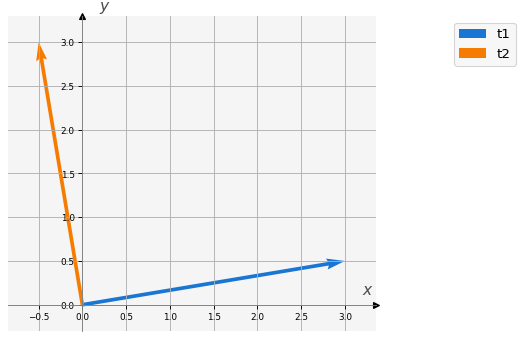

In [44]:
# Visualizamos los vectores.
v = mvis.Plotter()  # Definici√≥n de un objeto para crear figuras.
v.set_coordsys(1)   # Definici√≥n del sistema de coordenadas.
v.plot_vectors(1, [nt1, nt2], ['t1', 't2'], ofx=-0.1) # Graficaci√≥n de los vectores 'x' y 'y'.
v.grid()  # Muestra la rejilla del sistema de coordenadas.

Cada par de renglones o de columnas de una matriz ortogonal, son ortogonales entre s√≠. Adem√°s la longitud de cada columna o rengl√≥n es igual a 1.

In [45]:
# Definimos una matriz ortogonal
C = np.array([[1/3, 2/3, -2/3],
              [-2/3, 2/3, 1/3],
              [2/3, 1/3, 2/3]])

In [46]:
# Verificamos que es ortogonal
np.dot(C, C.T)

array([[ 1.00000000e+00, -1.54197642e-17,  2.46716228e-17],
       [-1.54197642e-17,  1.00000000e+00, -1.23358114e-17],
       [ 2.46716228e-17, -1.23358114e-17,  1.00000000e+00]])

In [47]:
# Verificamos ortogonalidad entre renglones
np.dot(C[0], C[1])

np.float64(-1.5419764230904953e-17)

In [48]:
# Verificamos ortogonalidad entre columnas
np.dot(C[:,0], C[:,1])

np.float64(1.5419764230904953e-17)

In [49]:
# Verificamos la norma de los renglones
np.linalg.norm(C[2])

np.float64(0.9999999999999999)

In [50]:
# Verificamos la norma de las columnas
np.linalg.norm(C[2])

np.float64(0.9999999999999999)

## Matriz transpuesta conjugada
La matriz $A^*$ representa a la matriz $A$ transpuesta y conjugada. La matriz $A^* = {\bar{a}_{ji}}$ se llama tambi√©n la adjunta de $A$.

In [51]:
# Creaci√≥n de una matriz con valores complejos
real = np.arange(1,10).reshape(3,3)
imag = np.arange(1,10).reshape(3,3)
C =  real + imag *1.0j
print(C)

[[1.+1.j 2.+2.j 3.+3.j]
 [4.+4.j 5.+5.j 6.+6.j]
 [7.+7.j 8.+8.j 9.+9.j]]


In [52]:
# Transpuesta conjugada
C.conj().T

array([[1.-1.j, 4.-4.j, 7.-7.j],
       [2.-2.j, 5.-5.j, 8.-8.j],
       [3.-3.j, 6.-6.j, 9.-9.j]])

## Matriz definida positiva

Una matriz $A$ se denomina **positiva definida** si $\langle A\vec{x}, \vec{x}\rangle = \vec{x}^T A\vec{x} > 0$ para cualquier vector no nulo $\vec{x}$ de $\mathbb{R}^n$. 

La matriz se llama **positiva semidefinida** si $\vec{x}^T A\vec{x} \ge 0$ para cualquier vector $\vec{x}$ de $\mathbb{R}^n$. 

Recordemos que:
$$
\vec{x}^T A\vec{x} = \sum_{i=1}^n \sum_{j=1}^n a_{ij} x_i x_j
$$

<div class="alert alert-info">

## Ejemplo 1.

Las siguientes dos rectas se cruzan en alg√∫n punto.

$$
\begin{array}{ccc}
3x + 2y & = &2 \\
2x + 6y & = &-8
\end{array}
$$

En t√©rminos de un sistema lineal, las dos ecuaciones anteriores se escriben como sigue:

$$
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{c}
x \\
y
\end{array} \right] =
\left[
\begin{array}{c}
2 \\ 
-8
\end{array} \right]
\tag{1}
$$

Podemos calcular $\vec{x}^T A\vec{x}$ para este ejemplo como sigue:    
</div>

In [53]:
# Usaremos sympy.
# Primero definimos los s√≠mbolos
x, y = sympy.symbols('x y')

# Construimos el vector de inc√≥gnitas
X = sympy.Matrix([x, y])
print(X)

# Construimos la matriz
A = sympy.Matrix([[3.0, 2.0], [2.0, 6.0]])
print(A)

Matrix([[x], [y]])
Matrix([[3.00000000000000, 2.00000000000000], [2.00000000000000, 6.00000000000000]])


In [54]:
# Calculamos xT * A * x
pos_def = X.T @ A @ X
pos_def

Matrix([[x*(3.0*x + 2.0*y) + y*(2.0*x + 6.0*y)]])

In [55]:
# Simplificamos
f = sympy.simplify(pos_def)
f

Matrix([[3.0*x**2 + 4.0*x*y + 6.0*y**2]])

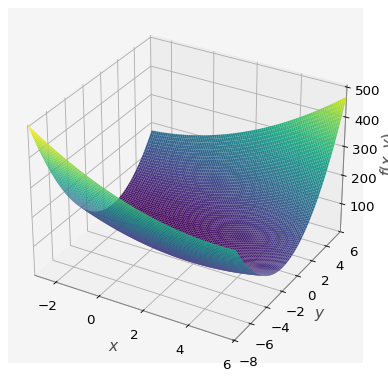

In [56]:
# Graficamos
sympy.plotting.plot3d(f[0], (x, -3, 6), (y, -8, 6))

Observa que se obtiene una funci√≥n cuadr√°tica cuya gr√°fica es un paraboloide orientado hacia arriba. Esta es una caracter√≠stica de las matrices definidas positivas. 


<div class="alert alert-success">

## Ejercicio 1.

Determinar si en el siguiente sistema de ecuaciones se tiene una matriz definida positiva:
$$
\begin{array}{ccc}
y & = & 0.10 x + 200 \\
y & = & 0.30 x + 20
\end{array}
$$

Sistema lineal.

$$
\left[
\begin{array}{cc}
0.10 & -1 \\
0.30 & -1
\end{array} \right]
\left[
\begin{array}{c}
x \\
y
\end{array} \right] =
\left[
\begin{array}{c}
-200 \\ 
-20
\end{array} \right] \tag{2}
$$

Guarda tu respuesta en la variable `respuesta = 'SI'` si la matriz es definida positiva o `respuesta =  'NO'` en caso contrario.
    
**Hint**: Utilizar el mismo c√≥digo del ejemplo 1 y modificarlo de acuerdo al ejercicio planteado. Observa c√≥mo sale la gr√°fica y responde la pregunta. Para un mejor resultado en la gr√°fica 3D, utiliza los intervalos $x \in [-6000, 6000]$ y $y = [-3000, 3000]$.

</div>

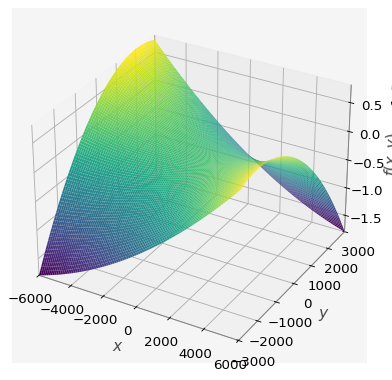

In [57]:
# B = sympy.Matrix(...)
# pos_def_B = ...
# fB = ...
# sympy.plotting.plot3D( ...)

### BEGIN SOLUTION
B = sympy.Matrix([[0.10, -1.0], [0.30, -1.0]])

pos_indef_B = X.T @ B @ X
fB = sympy.simplify(pos_indef_B)
sympy.plotting.plot3d(fB[0], (x, -6000, 6000), (y, -3000, 3000))
### END SOLUTION

# respuesta = ...

## Eigenvalores y Eigenvectores

Si $A$ es una matriz cuadrada, entonces definimos el n√∫mero $\lambda$ (real o complejo) como **eigenvalor** (**valor propio** o **autovalor**) de $A$ si $A\vec{u} = \lambda \vec{u}$, o equivalentemente si $det(A - \lambda I) = 0$. El vector $\vec{u}$ se llama **eigenvector** (**vector propio** o **autovector**) de $A$. El conjunto de todos los autovalores de la matriz $A$ se denomina espectro de $A$ y se denota como $\rho(A)$.

In [60]:
# Usamos la matriz del Ejemplo 1.
A = sympy.Matrix([[3.0, 2.0], [2.0, 6.0]])

# Convertimos la matriz A a un arreglo de numpy
A = np.array(A, dtype=float)
A

array([[3., 2.],
       [2., 6.]])

Los eigenvalores y eigenvectores se pueden calcular usando la funci√≥n `np.linalg.eig()}` `de numpy` como sigue:

In [61]:
np.linalg.eig(A)  # w: eigenvalues, v: eigenvectors

EigResult(eigenvalues=array([2., 7.]), eigenvectors=array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]]))

Tambi√©n podemos usar la funci√≥n `macti.matem.eigen_land()` para obtener mayor informaci√≥n de los eigenvalores y eigenvectores como sigue:

In [62]:
wA, vA = mmat.eigen_land(A)

eigenvalores = [2. 7.]
eigenvectores:
 [-0.89442719  0.4472136 ] 
 [-0.4472136  -0.89442719]
√°ngulo entre eigenvectores = 90.0


Podemos graficar los eigenvectores:

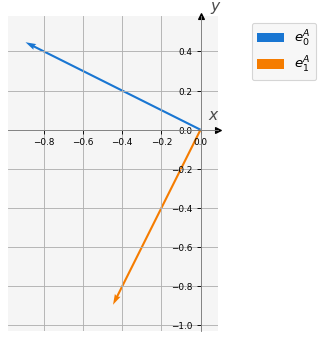

In [63]:
v = mvis.Plotter()
v.set_coordsys()
v.plot_vectors(1, [vA[:,0], vA[:,1]], ['$e_0^A$','$e_1^A$'])
v.grid()

Observa que en este caso los eigenvectores son ortogonales.

La relaci√≥n 

$$
A \vec{u} = \lambda \vec{u}
$$

indica b√°sicamente que al aplicar la matriz $A$ a un eigenvector $\vec{u}$, el resultado es el mismo vector escalado $\lambda \vec{u}$, es decir no lo rota. Cualquier otro vector, que no sea un m√∫ltiplo de los eigenvectores, ser√° rotado. Veamos esto en el siguiente c√≥digo:

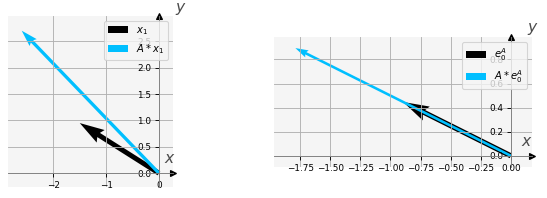

In [161]:
# definimos un vector
x1 = np.array([-1.5,0.95])

# Aplicamos la matriz A
r1 = A @ x1

# Ahora graficamos
v = mvis.Plotter(1, 2, fig_par=dict(figsize=(8,3)))

v.set_coordsys(1)
v.plot_vectors(1, [x1, r1], 
                  ['$x_1$', '$A * x_1$'], 
               w = [0.03, 0.02], lcolors = ['black', 'deepskyblue'])
v.set_coordsys(2)
v.plot_vectors(2, [vA[:,0], A @ vA[:,0]], 
                  ['$e_0^A$', '$A * e_0^A$'], 
               w = [0.02, 0.01], lcolors = ['black', 'deepskyblue'], ofx=-100.0)

v.legend([1,2], fontsize=9, ncol=1, loc='upper right')
v.grid()

Observamos que el eigenvectpr $e_0^A$ no rota cuando se le aplica $A$, pero el vector $\vec{x}_1$ si es rotado un cierto √°ngulo cuando le aplicamos la matriz $A$.

## Normas Matriciales.

La norma de una matriz $A$ es un n√∫mero real positivo denotado por $||A||$.
Dadas cualesquiera dos matrices $A$ y $B$ se cumplen los siguiente axiomas.
1. $||A|| \ge 0$.
2. $||A|| = 0 \iff A = 0$.
3. $||aA|| = |a| ||A||$ para cualquier n√∫mero real $a$.
4. $||A+B|| \le ||A|| + ||B||$ (desigualdad triangular).
5. $||AB|| \le ||A||||B||$ (compatibilidad).

Definimos la siguiente matriz

$$
M =
\begin{bmatrix}
-3 & 2 \\
1 & -5
\end{bmatrix}
$$


In [134]:
M = np.array([[-3, 2],[1, -5]])
M

array([[-3,  2],
       [ 1, -5]])

### Norma 1.
Consiste en sumar los valores absolutos de los elementos de cada **columna** y luego calular 
la suma m√°xima:
$$
||A||_1 = \max_{1 \le j \le n} \left( \sum_{i=1}^n  |a_{ij}| \right)
$$

In [136]:
A_n1 = np.linalg.norm(M,1)
print(A_n1)

7.0


### Norma $\infty$.
Consiste en sumar los valores absolutos de los elementos de cada **rengl√≥n** y luego calular 
la suma m√°xima:
$$
||A||_\infty = \max_{1 \le i \le n} \left( \sum_{j=1}^n  |a_{ij}| \right)
$$

In [138]:
A_nI = np.linalg.norm(M, np.inf)
print(A_nI)

6.0


### Norma de Frobenius

$$
||A||_F = \left( \sum_{i=1}^n \sum_{j=1}^n |a_{ij}|^2 \right)^{1/2}
$$

In [139]:
A_nFro = np.linalg.norm(M, 'fro')
print(A_nFro)

6.244997998398398


<div class="alert alert-info">

## Ejemplo 2.

Verificar que se cumplen los 5 axiomas de las normas matriciales para la Norma 1 usando la matriz $M$.
</div>

**Axioma 1**. $||M||_1 \geq 0$

In [141]:
M_n1 = np.linalg.norm(M,1 )
print('M =\n {}'.format(M))
print('‚à•M‚à•‚ÇÅ = {}'.format(M_n1))

M =
 [[-3  2]
 [ 1 -5]]
‚à•M‚à•‚ÇÅ = 7.0


**Axioma 2.** 

In [142]:
ZERO = np.array([[0.0, 0.0], [0.0, 0.0]])
ZERO_n1 = np.linalg.norm(ZERO,1)
print('ZERO = \n{}'.format(ZERO))
print('‚à•ZERO‚à•‚ÇÅ = {}'.format(ZERO_n1))

ZERO = 
[[0. 0.]
 [0. 0.]]
‚à•ZERO‚à•‚ÇÅ = 0.0


**Axioma 3.**

In [143]:
a = -3.5
a_M_n1 = np.linalg.norm(a * M, 1) 
print('‚à•M‚à•‚ÇÅ = {}, \t a = {}'.format(M_n1, a))
print('\n ‚à•a * M‚à•‚ÇÅ = {} \n |a| * ‚à•M‚à•‚ÇÅ = {}'.format(a_M_n1, np.abs(a) * M_n1))

‚à•M‚à•‚ÇÅ = 7.0, 	 a = -3.5

 ‚à•a * M‚à•‚ÇÅ = 24.5 
 |a| * ‚à•M‚à•‚ÇÅ = 24.5


**Axioma 4.**

In [146]:
N = np.arange(4).reshape(2,2)

M_p_N_n1= np.linalg.norm(M + N, 1)

N_n1 = np.linalg.norm(N, 1)

print('\nNorma 1:')
print(' ‚à•M + N‚à•‚ÇÅ = {}'.format(M_p_N_n1))
print(' ‚à•M‚à•‚ÇÅ + ‚à•N‚à•‚ÇÅ = {}'.format(M_n1 + N_n1))
print(' ¬ø ‚à•M + N‚à•‚ÇÅ ‚â§ ‚à•M‚à•‚ÇÅ + ‚à•N‚à•‚ÇÅ ? ‚Æï {}'.format(M_p_N_n1 <= M_n1 + N_n1))


Norma 1:
 ‚à•M + N‚à•‚ÇÅ = 6.0
 ‚à•M‚à•‚ÇÅ + ‚à•N‚à•‚ÇÅ = 11.0
 ¬ø ‚à•M + N‚à•‚ÇÅ ‚â§ ‚à•M‚à•‚ÇÅ + ‚à•N‚à•‚ÇÅ ? ‚Æï True


**Axioma 5.**

In [147]:
M_x_N_n1= np.linalg.norm(M * N, 1)

print('\nNorma 1:')
print(' ‚à•M * N‚à•‚ÇÅ = {}'.format(M_x_N_n1))
print(' ‚à•M‚à•‚ÇÅ * ‚à•N‚à•‚ÇÅ = {}'.format(M_n1 * N_n1))
print(' ¬ø ‚à•M * N‚à•‚ÇÅ ‚â§ ‚à•M‚à•‚ÇÅ * ‚à•N‚à•‚ÇÅ ? ‚Æï {}'.format(M_x_N_n1 <= M_n1 * N_n1))


Norma 1:
 ‚à•M * N‚à•‚ÇÅ = 17.0
 ‚à•M‚à•‚ÇÅ * ‚à•N‚à•‚ÇÅ = 28.0
 ¬ø ‚à•M * N‚à•‚ÇÅ ‚â§ ‚à•M‚à•‚ÇÅ * ‚à•N‚à•‚ÇÅ ? ‚Æï True


<div class="alert alert-success">

## Ejercicio 2.

Verificar se cumplen los axiomas de las normas para $||\cdot||_F$ usando la matriz $M$.

</div>

**Axioma 1.**

<div class="alert alert-info">

El resultado deber√≠a ser:

```
M =
 [[-3  2]
 [ 1 -5]]
‚à•M‚à•F = 6.244997998398398
```
</div>

In [148]:
### BEGIN SOLUTION
M_nF = np.linalg.norm(M,'fro')
print('M =\n {}'.format(M))
print('‚à•M‚à•F = {}'.format(M_nF))
### END SOLUTION

M =
 [[-3  2]
 [ 1 -5]]
‚à•M‚à•F = 6.244997998398398


**Axioma 2.**

<div class="alert alert-info">

El resultado deber√≠a ser:

```
ZERO = 
[[0. 0.]
 [0. 0.]]
‚à•ZERO‚à•F = 0.0
```
</div>

In [149]:
### BEGIN SOLUTION
ZERO_nF = np.linalg.norm(ZERO,'fro')
print('ZERO = \n{}'.format(ZERO))
print('‚à•ZERO‚à•F = {}'.format(ZERO_nF))
### END SOLUTION

ZERO = 
[[0. 0.]
 [0. 0.]]
‚à•ZERO‚à•F = 0.0


**Axioma 3.**

<div class="alert alert-info">

El resultado deber√≠a ser:

```
‚à•M‚à•F = 6.244997998398398, 	 a = -3.5

 ‚à•a * M‚à•F = 21.857492994394395 
 |a| * ‚à•M‚à•F = 21.857492994394395
```
</div>

In [150]:
### BEGIN SOLUTION
a = -3.5
a_M_nF = np.linalg.norm(a * M, 'fro') 
print('‚à•M‚à•F = {}, \t a = {}'.format(M_nF, a))
print('\n ‚à•a * M‚à•F = {} \n |a| * ‚à•M‚à•F = {}'.format(a_M_nF, np.abs(a) * M_nF))
### END SOLUTION

‚à•M‚à•F = 6.244997998398398, 	 a = -3.5

 ‚à•a * M‚à•F = 21.857492994394395 
 |a| * ‚à•M‚à•F = 21.857492994394395


**Axioma 4.**

<div class="alert alert-info">

El resultado deber√≠a ser:

```
Norma de Frobenius:
 ‚à•M + N‚à•F = 5.5677643628300215
 ‚à•M‚à•F + ‚à•N‚à•F = 9.98665538517234
 ¬ø ‚à•M + N‚à•F ‚â§ ‚à•M‚à•F + ‚à•N‚à•F ? : True
```
</div>

In [151]:
### BEGIN SOLUTION
N = np.arange(4).reshape(2,2)

M_p_N_nF= np.linalg.norm(M + N, 'fro')

N_nF = np.linalg.norm(N, 'fro')

print('\nNorma de Frobenius:')
print(' ‚à•M + N‚à•F = {}'.format(M_p_N_nF))
print(' ‚à•M‚à•F + ‚à•N‚à•F = {}'.format(M_nF + N_nF))
print(' ¬ø ‚à•M + N‚à•F ‚â§ ‚à•M‚à•F + ‚à•N‚à•F ? : {}'.format(M_p_N_nF <= M_nF + N_nF))
### END SOLUTION


Norma de Frobenius:
 ‚à•M + N‚à•F = 5.5677643628300215
 ‚à•M‚à•F + ‚à•N‚à•F = 9.98665538517234
 ¬ø ‚à•M + N‚à•F ‚â§ ‚à•M‚à•F + ‚à•N‚à•F ? : True


**Axioma 5.**

<div class="alert alert-info">

El resultado deber√≠a ser:

```
Norma de Frobenius:
 ‚à•M * N‚à•F = 15.264337522473747
 ‚à•M‚à•F * ‚à•N‚à•F = 23.366642891095847
 ¬ø ‚à•M * N‚à•F ‚â§ ‚à•M‚à•F * ‚à•N‚à•F ? : True
```
</div>

In [152]:
### BEGIN SOLUTION
M_x_N_nF= np.linalg.norm(M * N, 'fro')

print('\nNorma de Frobenius:')
print(' ‚à•M * N‚à•F = {}'.format(M_x_N_nF))
print(' ‚à•M‚à•F * ‚à•N‚à•F = {}'.format(M_nF * N_nF))
print(' ¬ø ‚à•M * N‚à•F ‚â§ ‚à•M‚à•F * ‚à•N‚à•F ? : {}'.format(M_x_N_nF <= M_nF * N_nF))
### END SOLUTION


Norma de Frobenius:
 ‚à•M * N‚à•F = 15.264337522473747
 ‚à•M‚à•F * ‚à•N‚à•F = 23.366642891095847
 ¬ø ‚à•M * N‚à•F ‚â§ ‚à•M‚à•F * ‚à•N‚à•F ? : True


### N√∫mero de condici√≥n

El n√∫mero de condici√≥n de una matriz $A$ se define como

$$
\kappa(A) = ||A|| \; ||A^{-1}||
$$

Este n√∫mero siempre es m√°s grande o igual a 1. Adem√°s nos da informaci√≥n 
acerca de que tan bien o mal est√° definido un problema que depende de la matriz en cuesti√≥n.
Entre m√°s grande sea este n√∫mero es m√°s dif√≠cil de resolver el problema.

In [153]:
A = np.array([[3., 2.],[2., 6.]])
print(A)
# Calculamos el n√∫mero de condici√≥n usando funciones de numpy
kA_F = np.linalg.norm(A, 'fro') * np.linalg.norm(np.linalg.inv(A), 'fro')
print('ùúÖ(A) = {}'.format(kA_F))

[[3. 2.]
 [2. 6.]]
ùúÖ(A) = 3.7857142857142847


In [154]:
# Existe una funci√≥n para calcular el n√∫mero de condici√≥n directamente
kA_F = np.linalg.cond(A, 'fro')
print('ùúÖ(A) = {}'.format(kA_F))

ùúÖ(A) = 3.7857142857142847


In [155]:
# Matriz con un n√∫mero de condici√≥n m√°s grande
B = np.array([[0.10, -1],[0.30, -1]])
kB_F = np.linalg.cond(B, 'fro')
print(B)
print('ùúÖ(B) = {}'.format(kB_F))

[[ 0.1 -1. ]
 [ 0.3 -1. ]]
ùúÖ(B) = 10.5


In [156]:
# Matriz mal condicionada
C = np.array([[0.10, -1000],[0.30, -1]])
kC_F = np.linalg.cond(C, 'fro')
print(C)
print('ùúÖ(C) = {}'.format(kC_F))

[[ 1.e-01 -1.e+03]
 [ 3.e-01 -1.e+00]]
ùúÖ(C) = 3334.448482827609


<div class="alert alert-success">

## Ejercicio 3.

Calcula el n√∫mero de condici√≥n para las matrices $A$, $B$ y $C$ usando las normas 1 y 2. Utiliza la funci√≥n `print()` de tal manera que obtengas una salida similar a la siguiente:

```
N√∫mero de condici√≥n con la norma 1:
 ùúÖ(A) = ...
 ùúÖ(B) = ...
 ùúÖ(C) = ...
N√∫mero de condici√≥n con la norma 2:
 ùúÖ(A) = ... 
 ùúÖ(B) = ...
 ùúÖ(C) = ...
```

</div>

In [157]:
# Con la norma 1
# kA_1 = ...
# ...
# print('N√∫mero ...)
# print('ùúÖ(A) = {}, ...)

# Con la norma 2
# ...

### BEGIN SOLUTION
# Usando la norma 1
kA_1 = np.linalg.cond(A, 1)
kB_1 = np.linalg.cond(B, 1)
kC_1 = np.linalg.cond(C, 1)
print('N√∫mero de condici√≥n con la norma 1:')
print(' ùúÖ(A) = {} \n ùúÖ(B) = {}\n ùúÖ(C) = {}'.format(kA_1, kB_1, kC_1))

# Usando la norma 2
kA_2 = np.linalg.cond(A, 2)
kB_2 = np.linalg.cond(B, 2)
kC_2 = np.linalg.cond(C, 2)
print('N√∫mero de condici√≥n con la norma 2:')
print(' ùúÖ(A) = {} \n ùúÖ(B) = {}\n ùúÖ(C) = {}'.format(kA_2, kB_2, kC_2))
### END SOLUTION

N√∫mero de condici√≥n con la norma 1:
 ùúÖ(A) = 4.571428571428571 
 ùúÖ(B) = 13.0
 ùúÖ(C) = 3338.113037679226
N√∫mero de condici√≥n con la norma 2:
 ùúÖ(A) = 3.499999999999999 
 ùúÖ(B) = 10.40388203202208
 ùúÖ(C) = 3334.4481829279107
